# CS112 Final project 🛠

## 📚 Required Libraries
### 📤 Installation

In [1]:
#install.packages("rbounds")

### 🗃 Importing

In [2]:
library(MatchIt)

#library(Zelig)
library(rbounds)
library(cobalt)

library(gridExtra)
library(ggplot2)

Loading required package: Matching



Loading required package: MASS



## 
##  Matching (Version 4.9-7, Build Date: 2020-02-05)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##




 cobalt (Version 4.2.4, Build Date: 2020-11-05 17:30:21 UTC)




Attaching package: ‘cobalt’




The following object is masked from ‘package:MatchIt’:

    lalonde




## Data Processing
### Loading data
from `salta_data.Rdata` file

In [3]:
# Goal: Recode data for matching analysis
# Dependency: "salta_data.Rdata"
# Output: "datamatch.Rdata"






load("salta_data.RData")

attach(salta.data)

polling.place <- escuela

system <- sistema

### 💉 Recoding Treatment variable (from RAW Spanish DATA)
EV = 1 if electronic votes;
EV = 0 if traditional voting

In [4]:
# Voting System
# electronic (VE) or traditional (VT) voting?
EV <- NULL
EV[system == "VE"] <- 1
EV[system == "VT"] <- 0

### 📈 Recoding Outcome variables (from RAW Spanish DATA)
#### Overall assessment of voting experience
- Evaluation of voting experience: 1 if voting experience was ‘very good’; and 0 if ‘good’, ‘bad’ or ‘very bad’ -  **eval.voting**
- Qualification of poll workers: 1 if ‘very qualified’ or ‘somewhat qualified’; and 0 if ‘little qualified’ or ‘not at all qualified’: **capable.auth**
- Substitution of traditional voting by e-voting: 1 if ‘agree a lot’ or ‘agree’; and 0 if ‘disagree’ or ‘disagree a lot’: **agree.evoting**

#### Ease of use and speed of voting process
- Speed of voting process: 1 if ‘very quick’ or ‘quick’; and 0 if ‘slow’ or ‘very slow’: **speed**
- Ease of voting procedure: 1 if voting was ‘very easy’; and 0 if ‘easy’, ‘difficult’ or ‘very difficult’: **easy.voting**
- Preferred method for selecting candidates from different political parties: 1 if ‘electronically’, and 0 if ‘by hand’: **eselect.cand**

#### Confidence in the fairness of the election process
- Confidence on vote being counted: 1 if ‘very sure’ or ‘sure’; and 0 if ‘unsure’ or ‘very unsure’: **sure.counted**
- Confidence on ballot secrecy: 1 if ‘very confident’ or ‘confident’; and 0 if ‘not confident’ or ‘not at all confident’: **conf.secret**
- Cleanness of elections in Salta: 1 if ‘very clean’ or ‘somewhat clean’; and 0 if ‘a little clean’ or ‘not at all clean’: **how.clean**


In [5]:
# poll workers qualified enough?

prop.table(table(capaci_autoridades))

capable.auth <- NULL
capable.auth[capaci_autoridades == "Nada Capacitadas"] <- 0
capable.auth[capaci_autoridades == "Poco Capacitadas"] <- 0
capable.auth[capaci_autoridades == "Bastante Capacitadas"] <- 1
capable.auth[capaci_autoridades == "Muy Capacitadas"] <- 1

# quality of voting experience?

prop.table(table(calif_votac))

eval.voting <- NULL
eval.voting[calif_votac == "Muy Malo"] <- 0
eval.voting[calif_votac == "Malo"] <- 0
eval.voting[calif_votac == "Bueno"] <- 0
eval.voting[calif_votac == "Muy Bueno"] <- 1

# difficulty of voting experience?

prop.table(table(facil))

easy.voting <- NULL
easy.voting[as.numeric(facil) == 2] <- 1
easy.voting[as.numeric(facil) == 3] <- 0
easy.voting[as.numeric(facil) == 4] <- 0
easy.voting[as.numeric(facil) == 5] <- 0

# how sure vote counted?

prop.table(table(cuàn_seguro))

sure.counted <- NULL
sure.counted[as.numeric(cuàn_seguro) == 2] <- 1
sure.counted[as.numeric(cuàn_seguro) == 3] <- 1
sure.counted[as.numeric(cuàn_seguro) == 4] <- 0
sure.counted[as.numeric(cuàn_seguro) == 5] <- 0

# how confident vote secret?

prop.table(table(cuàn_confiado))

conf.secret <- NULL
conf.secret[as.numeric(cuàn_confiado) == 2] <- 1
conf.secret[as.numeric(cuàn_confiado) == 3] <- 1
conf.secret[as.numeric(cuàn_confiado) == 4] <- 0
conf.secret[as.numeric(cuàn_confiado) == 5] <- 0

# believe provincial elections are clean?

prop.table(table(elecc_limpias))

how.clean <- NULL
how.clean[as.numeric(elecc_limpias) == 2] <- 1
how.clean[as.numeric(elecc_limpias) == 3] <- 1
how.clean[as.numeric(elecc_limpias) == 4] <- 0
how.clean[as.numeric(elecc_limpias) == 5] <- 0

# how quick was process?

prop.table(table(rapidez_proceso))

speed <- NULL
speed[as.numeric(rapidez_proceso) == 2] <- 1
speed[as.numeric(rapidez_proceso) == 3] <- 1
speed[as.numeric(rapidez_proceso) == 4] <- 0
speed[as.numeric(rapidez_proceso) == 5] <- 0

# agree replacing VT by VE?

prop.table(table(reemplazoVTxVE))

agree.evoting <- NULL
agree.evoting[as.numeric(reemplazoVTxVE) == 2] <- 1
agree.evoting[as.numeric(reemplazoVTxVE) == 3] <- 1
agree.evoting[as.numeric(reemplazoVTxVE) == 4] <- 0
agree.evoting[as.numeric(reemplazoVTxVE) == 5] <- 0

# select candidates electronically?

prop.table(table(sist_voto_categ))

eselect.cand <- NULL
eselect.cand[as.numeric(sist_voto_categ) == 2] <- 0
eselect.cand[as.numeric(sist_voto_categ) == 3] <- 1

capaci_autoridades
         No Contesta      Muy Capacitadas Bastante Capacitadas 
         0.002663116          0.354860186          0.425432756 
    Poco Capacitadas     Nada Capacitadas              No Sabe 
         0.159121172          0.019973369          0.037949401 

calif_votac
No Contesta   Muy Bueno       Bueno        Malo    Muy Malo     No Sabe 
0.003328895 0.358854860 0.579227696 0.040612517 0.010652463 0.007323569 

facil
No Contesta   Muy Fácil       Fácil     Difícil Muy Difícil     No Sabe 
0.003328895 0.246338216 0.695739015 0.043941411 0.009320905 0.001331558 

cuàn_seguro
 No Contesta   Muy Seguro       Seguro     Inseguro Muy Inseguro      No Sabe 
  0.01198402   0.20106525   0.59054594   0.15512650   0.01464714   0.02663116 

cuàn_confiado
    No Contesta    Muy Confiado        Confiado     Desconfiado Muy Desconfiado 
    0.004660453     0.180426099     0.595206391     0.173768309     0.019307590 
        No Sabe 
    0.026631158 

elecc_limpias
     No Contesta      Muy Limpias Bastante Limpias     Poco Limpias 
      0.02063915       0.15912117       0.28029294       0.35419441 
    Nada Limpias          No Sabe 
      0.07390146       0.11185087 

rapidez_proceso
No Contesta  Muy Rápido      Rápido       Lento   Muy Lento     No Sabe 
0.019973369 0.261651132 0.548601864 0.122503329 0.044607190 0.002663116 

reemplazoVTxVE
      No Contesta    Muy de Acuerdo        De Acuerdo     En Desacuerdo 
       0.01131824        0.24900133        0.46737683        0.20372836 
Muy en Desacuerdo           No Sabe 
       0.03195739        0.03661784 

sist_voto_categ
                           No Contesta              Cortar a mano las boletas 
                            0.02463382                             0.26631158 
Elegir los candidatos electrónicamente                                No Sabe 
                            0.66910786                             0.03994674 

### Recoding Covariate variables (from RAW Spanish DATA)

In [6]:
# Age groups
age <- edad
age.group <- NULL
age.group[age < 30] <- 1
age.group[age > 29 & age < 40] <- 2
age.group[age > 39 & age < 50] <- 3
age.group[age > 49 & age < 65] <- 4
age.group[age > 64] <- 5

# Gender
male <- NULL
male[sexo == "MASCULINO"] <- 1
male[sexo == "FEMENINO"] <- 0

# Education
educ <- NULL
educ[educ_enc == "Sin Estudios" | educ_enc == "Primario Incompleto"] <- 1
educ[educ_enc == "Primario Completo"] <- 2
educ[educ_enc == "Secundario Incompleto"] <- 3
educ[educ_enc == "Secundario Completo"] <- 4
educ[educ_enc == "Terciario Incompleto"] <- 5
educ[educ_enc == "Terciario Completo"] <- 6
educ[educ_enc == "Universitario Incompleto"] <- 7
educ[educ_enc == "Universitario Completo" | educ_enc == "Posgrado"] <- 9

# I have no clue
white.collar <- NULL
white.collar[ocupac == "EMPLEADO PUBLICO"|ocupac == "COMERCIANTE SIN EMPLEADOS" | ocupac == "EMPLEADO SECTOR PRIVADO" | ocupac == "PROF/COMERCIANTE EMPLEADOS A CARGO"] <- 1
white.collar[ocupac != "EMPLEADO PUBLICO"&ocupac != "COMERCIANTE SIN EMPLEADOS"&ocupac != "EMPLEADO SECTOR PRIVADO"&ocupac != "PROF/COMERCIANTE EMPLEADOS A CARGO"] <- 0

# Emplyment type
not.full.time <- NULL
not.full.time[ocupac == "ESTUDIANTE" | ocupac == "AMA DE CASA" | ocupac == "DESOCUPADO" | ocupac == "SUBSIDIADO/PLANES/ASIGNACIONES" | ocupac == "TRABAJOS TEMPORARIOS" | ocupac == "EMPLEADO INFORMAL" | ocupac == "JUBILADO/PENSIONADO" | ocupac == "RENTISTA"] <- 1
not.full.time[ocupac == "ESTUDIANTE" | ocupac != "AMA DE CASA" & ocupac != "DESOCUPADO" & ocupac != "SUBSIDIADO/PLANES/ASIGNACIONES" & ocupac != "TRABAJOS TEMPORARIOS" & ocupac != "EMPLEADO INFORMAL" & ocupac != "JUBILADO/PENSIONADO" & ocupac != "RENTISTA"] <- 0

# Partial score for internet use
internet.work <- NULL
internet.work[internet_trabajar == "No"] <- 0
internet.work[internet_trabajar == "Si"] <- 1

# Partial score for internet games
internet.play <- NULL
internet.play[internet_jugar == "No"] <- 0
internet.play[internet_jugar == "Si"] <- 1

# Partial score for ATM usage
atm <- NULL
atm[cajeros == "No"] <- 0
atm[cajeros == "Si"] <- 1

# Partial phone for cell phone use
cell <- NULL
cell[celular == "No"] <- 0
cell[celular == "Si"] <- 1

# Partial score for owning pc
pc.own <- NULL
pc.own[PC_propia == "No"] <- 0
pc.own[PC_propia == "Si"] <- 1

#Total IT skill score based on previous partial scores
tech <- internet.work+internet.play+atm+cell+pc.own+1

In [7]:
# We should translate these table names, I am lost
table(randazzo)
table(figueroa)
table(alperovich)

info1 <- NULL
info1[as.numeric(randazzo) == 1 | as.numeric(randazzo) == 2 | as.numeric(randazzo) == 3] <- 1
info1[as.numeric(randazzo) == 4 | as.numeric(randazzo) == 5] <- 0

info2 <- NULL
info2[as.numeric(figueroa) == 1 | as.numeric(figueroa) == 2 | as.numeric(figueroa) == 3] <- 1
info2[as.numeric(figueroa) == 4 | as.numeric(figueroa) == 5] <- 0


info3 <- NULL
info3[as.numeric(alperovich) == 1 | as.numeric(alperovich) == 2 | as.numeric(alperovich) == 3] <- 1
info3[as.numeric(alperovich) == 4 | as.numeric(alperovich) == 5] <- 0

pol.info <- 1 + info1 + info2 + info3

table(pol.info)

randazzo
          OK cargo ó cartera           OK cargo y cartera 
                          71                          174 
OK Cargo y cualquier cartera             Otro funcionario 
                          43                           23 
                     No sabe 
                        1191 

figueroa
          OK cargo ó cartera           OK cargo y cartera 
                           2                           53 
OK Cargo y cualquier cartera             Otro funcionario 
                           2                           46 
                     No sabe 
                        1399 

alperovich
                 OK cargo      OK cargo y provincia OK Cargo y otra provincia 
                       22                       235                         5 
         Otro funcionario                   No sabe 
                       31                      1209 

pol.info
   1    2    3    4 
1109  210  152   31 

### Export the data to df for matching

In [8]:
# Create and save dataframe for matching analysis 

datamatch <- data.frame(polling.place, EV, age.group, educ, male, tech, pol.info, white.collar, not.full.time, capable.auth, eval.voting, easy.voting, sure.counted, conf.secret, how.clean, speed, agree.evoting, eselect.cand)

save(datamatch, file="datamatch.Rdata")

## Matching
### Loading the clean dataset

In [9]:
# File name: "matching_script.R"
# Goal: Estimate effect of e-voting using matching
# Dependency: "datamatch.Rdata" 

load("datamatched.rdata")

outcomes <- datamatch[10:18]

outcomes.lbls <- names(outcomes)

n.outcomes <- dim(outcomes)[2]

### Table 1 - Summary Statistics (Not needed?)

In [10]:

tab1 <- matrix(NA, nrow = n.outcomes, ncol = 6)
rownames(tab1) <- outcomes.lbls
colnames(tab1) <- c("N", "prop.all", "prop.ev", "prop.tv", "diff", "pvalue")

for (i in 1:n.outcomes) {
  tab1[i, 1] <- length(na.omit(outcomes[, i]))
  tab1[i, 2] <- prop.table(table(outcomes[, i]))[2] * 100	
  tab1[i, 3:4] <- rev(prop.table(table(outcomes[, i], datamatch$EV), 2)[2, ]) * 100
  tab1[i, 5] <- tab1[i, 3] - tab1[i, 4]	
  tab1[i, 6] <- prop.test(table(outcomes[, i], datamatch$EV)[2, ], n = apply(table(outcomes[, i], datamatch$EV), 2, sum))$p.value
}

tab1 <- tab1[rev(order(tab1[, "diff"])), ]

### Table 1 ###

print(tab1, digits = 4)


                 N prop.all prop.ev prop.tv   diff    pvalue
eselect.cand  1405    71.53   84.00   53.48 30.511 2.695e-35
eval.voting   1486    36.27   46.64   21.25 25.392 2.458e-23
easy.voting   1495    24.75   34.01   11.42 22.594 4.350e-23
agree.evoting 1430    75.24   84.09   62.59 21.500 3.348e-20
how.clean     1303    50.65   57.69   40.98 16.709 3.621e-09
sure.counted  1444    82.34   86.20   76.74  9.459 5.067e-06
capable.auth  1441    81.33   84.99   76.32  8.678 4.009e-05
speed         1468    82.90   84.31   80.84  3.467 9.663e-02
conf.secret   1455    80.07   77.15   84.16 -7.009 1.227e-03


### Table 2 | Balance Statistics: pre-matching

In [11]:
# Drop observations with missing values in covariates

datamatch[, 10:18][is.na(datamatch[, 10:18]) == "TRUE"] <- 99999
datamatch <- na.omit(datamatch)

#__________________________ Table 2, pre-matching __________________________#

EV <- datamatch[2]

covariates <- datamatch[c("age.group", "educ", "white.collar", "not.full.time", "male", "tech", "pol.info")]
covariate.lbls <- names(covariates)

n.covariates <- dim(covariates)[2]

tab2.pre <- matrix(NA, nrow = n.covariates, ncol = 4)
rownames(tab2.pre) <- covariate.lbls
colnames(tab2.pre) <- c("ev", "tv", "diff", "pvalue")

tab2.pre[, 1:2] <- cbind(apply(covariates[EV == 1,], 2, mean), apply(covariates[EV == 0,], 2, mean))
tab2.pre[, 3] <- tab2.pre[, 1] - tab2.pre[, 2]

for (i in c(1, 2, 6, 7)){
  tab2.pre[i, 4] <- ks.boot(covariates[, i][EV == 1], covariates[, i][EV == 0], nboots = 500)$ks.boot.pvalue
}
for (i in c(3, 4, 5)){
  tab2.pre[i, 4] <- prop.test(table(covariates[, i], EV$EV), n = apply(table(covariates[,i],EV$EV),2, sum))$p.value
}

### Table 3 | Causal Effect of e-voting: pre-matching

In [12]:
#__________________________ Table 3, pre-matching __________________________#

datamatch[datamatch == 99999] <- NA

outcomes.pre <- datamatch[10:18]

tab3.pre <- matrix(NA,nrow = n.outcomes,ncol = 5)
rownames(tab3.pre) <- outcomes.lbls
colnames(tab3.pre) <- c("N", "prop.ev", "prop.tv", "diff", "pvalue")

for (i in 1:n.outcomes) {
  tab3.pre[i, 1] <- length(na.omit(outcomes.pre[, i]))
  tab3.pre[i, 2:3] <- rev(prop.table(table(outcomes.pre[,i],datamatch$EV),2)[2,])*100
  tab3.pre[i, 4] <- tab3.pre[i, 2] - tab3.pre[i, 3]	
  tab3.pre[i, 5] <- prop.test(table(outcomes.pre[, i], datamatch$EV)[2, ], n = apply(table(outcomes.pre[, i], datamatch$EV), 2, sum))$p.value
}

datamatch[, 10:18][is.na(datamatch[, 10:18]) == "TRUE"] <- 99999



### 🔎 Propensity score matching

In [13]:
# Original Code
print("Matching")

set.seed(36466)

m.propensity.out <- matchit(EV ~ age.group + I(age.group^2) + I(age.group^3) + age.group:educ + age.group:tech + educ + I(educ^2) + tech + I(tech^2) + pol.info + educ:pol.info + age.group:pol.info + tech:pol.info + white.collar + not.full.time + male, caliper = 0.05, data = datamatch, method = "nearest", verbose = TRUE)

#save(m.out, file = "m.out.Rdata")

print("Balance Improvement")
#print(summary(m.propensity.out))

#pdf("balance.pdf")

#plot(m.propensity.out)
#plot(m.propensity.out, type = "hist")
#plot(m.propensity.out, type = "jitter")

#dev.off()


[1] "Matching"


Nearest neighbor matching... 


Warning message:
“Fewer control units than treated units; not all treated units will get a match.”


Calculating matching weights... Done.


[1] "Balance Improvement"


In [14]:
# Our old matching experiments that are no longer needed
print("Matching")

set.seed(36466)
head(datamatch)
dim(datamatch)
str(datamatch)

# https://sle-collaboration.minervaproject.com/?url=https%3A//sle-authoring.minervaproject.com/api/v1/worksheets/6ee39253-5e8d-4c26-b61a-67459c3ddd06/&userId=9301&name=Juraj+Vasek&avatar=https%3A//s3.amazonaws.com/picasso.fixtures/Juraj_Vasek_9301_2018-09-02T18%3A29%3A25.437Z&noPresence=1&readOnly=1&signature=69c8f4d36dd895e363d300818788b5435fbdf7e30eedc9bd640ec5331ecf63df

propensity <- glm(EV ~ age.group + I(age.group^2) + I(age.group^3) + age.group:educ + age.group:tech + educ + I(educ^2) + tech + I(tech^2) + pol.info + educ:pol.info + age.group:pol.info + tech:pol.info + white.collar + not.full.time + male,  data = datamatch, family = binomial) # caliper = 0.05,

datamatch$ps <- predict(propensity, type = "response") 

genout3 <- GenMatch(X = datamatch$ps, Tr = datamatch$EV)
mout3 <- Match(X =  datamatch$ps, Tr = datamatch$EV, Weight.matrix=genout3)

mb <- MatchBalance(EV ~ age.group + I(age.group^2) + I(age.group^3) + age.group:educ + age.group:tech + educ + I(educ^2) + tech + I(tech^2) + pol.info + educ:pol.info + age.group:pol.info + tech:pol.info + white.collar + not.full.time + male, data=datamatch, match.out=mout3, nboots=1000)

[1] "Matching"


,polling.place,EV,age.group,educ,male,tech,pol.info,white.collar,not.full.time,capable.auth,eval.voting,easy.voting,sure.counted,conf.secret,how.clean,speed,agree.evoting,eselect.cand
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Escuela de Comercio Juan Manuel de Estrada,1,4,4,1,2,2,0,0,1,1,0,1,1,1,1,1,1
2,Escuela de Comercio Juan Manuel de Estrada,1,2,3,1,2,1,0,1,0,1,0,1,0,99999,1,1,1
3,Escuela de Comercio Juan Manuel de Estrada,1,4,1,1,2,1,1,0,1,0,0,1,1,0,1,0,1
4,Escuela de Comercio Juan Manuel de Estrada,1,3,7,1,3,3,0,0,0,1,0,0,1,0,1,1,1
5,Escuela de Comercio Juan Manuel de Estrada,1,4,3,1,3,2,0,0,1,0,0,1,1,1,1,1,1
6,Escuela de Comercio Juan Manuel de Estrada,1,3,2,0,3,1,0,1,1,0,0,99999,0,0,1,1,1


[1] 1475   18

'data.frame':	1475 obs. of  18 variables:
 $ polling.place: Factor w/ 37 levels "E.E.T.","Escuela Juan Bautista Alberdi",..: 31 31 31 31 31 31 31 31 31 31 ...
 $ EV           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ age.group    : num  4 2 4 3 4 3 5 2 4 1 ...
 $ educ         : num  4 3 1 7 3 2 1 3 1 2 ...
 $ male         : num  1 1 1 1 1 0 1 0 1 0 ...
 $ tech         : num  2 2 2 3 3 3 1 3 2 2 ...
 $ pol.info     : num  2 1 1 3 2 1 1 1 1 1 ...
 $ white.collar : num  0 0 1 0 0 0 0 0 0 0 ...
 $ not.full.time: num  0 1 0 0 0 1 0 1 0 0 ...
 $ capable.auth : num  1 0 1 0 1 1 1 1 1 1 ...
 $ eval.voting  : num  1 1 0 1 0 0 0 0 0 0 ...
 $ easy.voting  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sure.counted : num  1 1 1 0 1 ...
 $ conf.secret  : num  1 0 1 1 1 0 1 1 1 1 ...
 $ how.clean    : num  1 99999 0 0 1 ...
 $ speed        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ agree.evoting: num  1 1 0 1 1 1 1 1 1 0 ...
 $ eselect.cand : num  1 1 1 1 1 1 1 1 1 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:27] 113 294 2

Loading required namespace: rgenoud



Warning message in GenMatch(X = datamatch$ps, Tr = datamatch$EV):
“The key tuning parameters for optimization were are all left at their default values.  The 'pop.size' option in particular should probably be increased for optimal results.  For details please see the help page and http://sekhon.berkeley.edu/papers/MatchingJSS.pdf”




Tue Dec 15 19:59:44 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	15
	(2) Uniform Mutation.................. 	12
	(3) Boundary Mutation................. 	12
	(4) Non-Uniform Mutation.............. 	12
	(5) Polytope Crossover................ 	12
	(6) Simple Crossover.................. 	12
	(7) Whole Non-Uniform Mutation........ 	12
	(8) Heuristic Crossover............... 	12
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 100
Maximum Nonchanging Generations: 4
Population size       : 100
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 7.529765e-01  8.902793e-01  
#unique......... 100, #Total UniqueCount:


***** (V1) age.group *****
                       Before Matching 	 	 After Matching
mean treatment........     2.4758 	 	     2.4758 
mean control..........     2.4433 	 	      2.406 
std mean diff.........     2.4035 	 	     5.1731 

mean raw eQQ diff.....   0.065681 	 	    0.09264 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          1 	 	          1 

mean eCDF diff........   0.013296 	 	   0.018528 
med  eCDF diff........   0.017038 	 	    0.02316 
max  eCDF diff........   0.026754 	 	   0.034483 

var ratio (Tr/Co).....      1.048 	 	     1.0543 
T-test p-value........    0.64508 	 	    0.12485 
KS Bootstrap p-value..      0.553 	 	      0.052 
KS Naive p-value......    0.96005 	 	    0.19826 
KS Statistic..........   0.026754 	 	   0.034483 


***** (V2) I(age.group^2) *****
                       Before Matching 	 	 After Matching
mean treatment........     7.9446 	 	     7.9446 
mean control..........     7.7011 	 	     7.5106 
std mean diff......

#### Table 2 | Balance Statistics: after propensity score matching

In [15]:
#___________________________________________________________________________#

# matched sample

datamatched.propensity <- match.data(m.propensity.out)
datamatched.propensity[datamatched.propensity == 99999] <- NA

save(datamatched.propensity, file = "datamatched.Rdata")

#__________________________ Table 2, post-matching _________________________#

EV.post <- datamatched.propensity[2]

covariates.post <- datamatched.propensity[, covariate.lbls]

tab2.post <- matrix(NA, nrow = n.covariates, ncol = 4)
rownames(tab2.post) <- covariate.lbls
colnames(tab2.post) <- c("ev", "tv", "diff", "pvalue")

tab2.post[, 1:2] <- cbind(apply(covariates.post[EV.post == 1, ], 2, mean), apply(covariates.post[EV.post == 0,], 2, mean))
tab2.post[, 3] <- tab2.post[, 1] - tab2.post[, 2]
for (i in c(1, 2, 6 , 7)){
  tab2.post[i, 4]<-ks.boot(covariates.post[,i][EV.post==1],covariates.post[,i][EV.post==0], nboots = 500)$ks.boot.pvalue
}
for (i in c(3, 4, 5)){
  tab2.post[i, 4] <- prop.test(table(covariates.post[, i], EV.post$EV), n = apply(table(covariates.post[, i], EV.post$EV),2 , sum))$p.value
}

tab2 <- cbind(tab2.pre, tab2.post)
tab2[3:5, c(1:3, 5:7)] <- tab2[3:5, c(1:3, 5:7)] * 100

### Table 2 ###

print(tab2, digits = 4)

                  ev     tv    diff  pvalue     ev     tv     diff pvalue
age.group      2.476  2.443  0.0324 0.58600  2.457  2.457  0.00000 0.9900
educ           4.771  4.143  0.6285 0.00000  4.219  4.205  0.01370 0.6980
white.collar  30.254 27.586  2.6678 0.29288 29.452 28.425  1.02740 0.7470
not.full.time 27.714 33.498 -5.7839 0.01998 30.651 31.507 -0.85616 0.8004
male          49.654 49.097  0.5567 0.87472 48.801 49.658 -0.85616 0.8149
tech           4.184  3.910  0.2739 0.00000  4.003  3.943  0.05993 0.4420
pol.info       1.475  1.310  0.1643 0.00000  1.360  1.322  0.03767 0.6160


#### Table 3  | Causal Effect of e-voting: after propensity score matching

In [16]:
#__________________________ Table 3, post-matching _________________________#

outcomes.post <- datamatched.propensity[10:18]

tab3.post <- matrix(NA, nrow = n.outcomes, ncol = 5)
rownames(tab3.post) <- outcomes.lbls
colnames(tab3.post) <- c("N", "prop.ev", "prop.tv", "diff", "pvalue")

for (i in 1:n.outcomes) {
  tab3.post[i, 1] <- length(na.omit(outcomes.post[, i]))
  tab3.post[i, 2:3] <- rev(prop.table(table(outcomes.post[, i], datamatched.propensity$EV), 2)[2, ]) * 100
  tab3.post[i, 4] <- tab3.post[i, 2] - tab3.post[i, 3]	
  tab3.post[i, 5] <- prop.test(table(outcomes.post[, i], datamatched.propensity$EV)[2, ], n = apply(table(outcomes.post[, i], datamatched.propensity$EV), 2, sum))$p.value
}

tab3 <- cbind(tab3.pre, tab3.post)

tab3 <- tab3[rev(order(tab3[, 9])), ]

### Table 3 ###

print(tab3, digits = 4)

                 N prop.ev prop.tv   diff    pvalue    N prop.ev prop.tv   diff
eselect.cand  1388   83.84   53.42 30.428 1.237e-34 1107   82.14   53.75 28.395
eval.voting   1460   46.33   21.30 25.035 1.833e-22 1155   44.73   20.66 24.073
agree.evoting 1409   84.14   62.44 21.705 2.864e-20 1120   83.10   62.72 20.372
easy.voting   1469   33.64   11.53 22.111 5.420e-22 1163   31.15   11.34 19.813
how.clean     1284   57.97   40.99 16.980 2.561e-09 1025   58.08   41.22 16.862
sure.counted  1418   86.35   77.02  9.332 7.444e-06 1121   85.92   77.32  8.597
capable.auth  1416   85.14   76.25  8.889 2.954e-05 1126   84.88   76.60  8.278
speed         1443   84.06   80.85  3.209 1.298e-01 1139   83.10   80.88  2.216
conf.secret   1431   77.11   84.53 -7.417 6.506e-04 1136   77.68   84.55 -6.870
                 pvalue
eselect.cand  7.444e-24
eval.voting   4.925e-18
agree.evoting 2.821e-14
easy.voting   2.644e-16
how.clean     9.550e-08
sure.counted  2.740e-04
capable.auth  5.845e-04
speed   

### 🧩 Genetic Matching

[1] "Matching"


Warning message:
“Fewer control units than treated units; not all treated units will get a match.”


[1] "Balance Improvement"


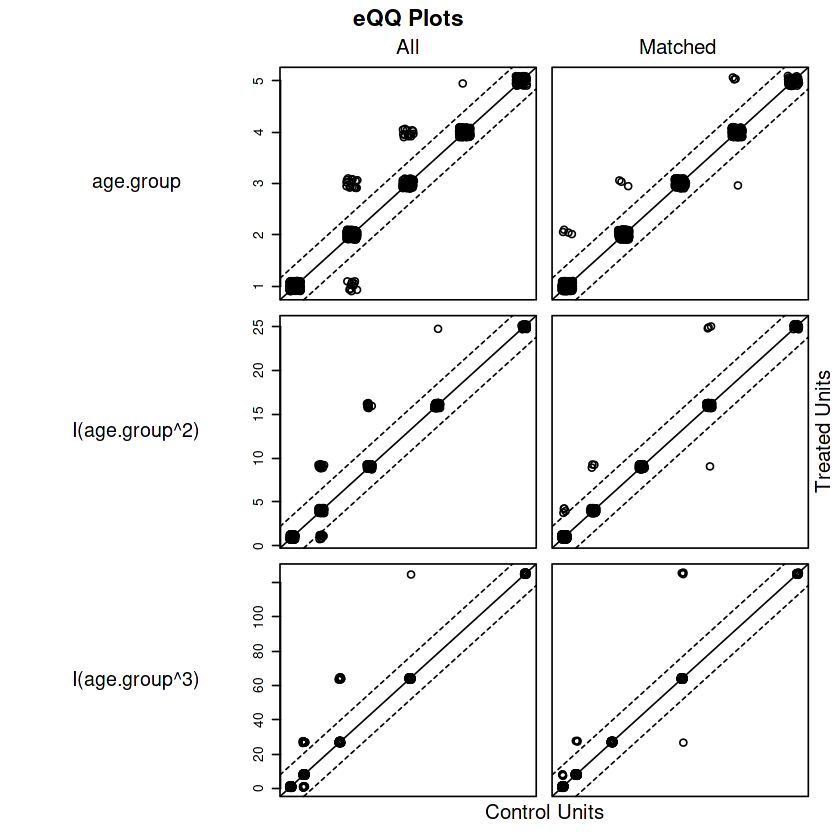

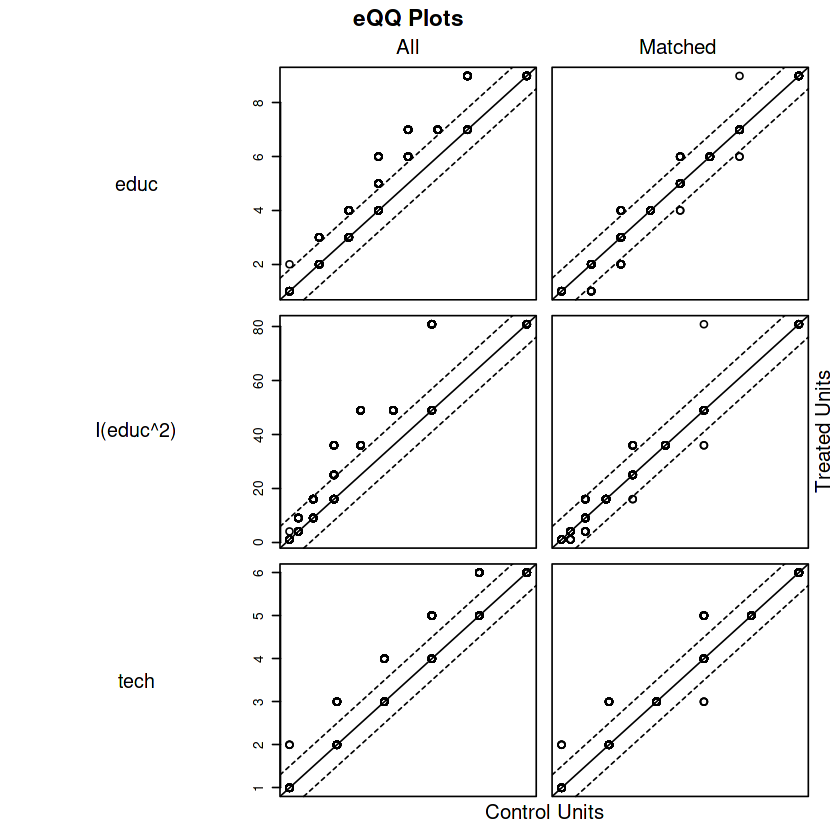

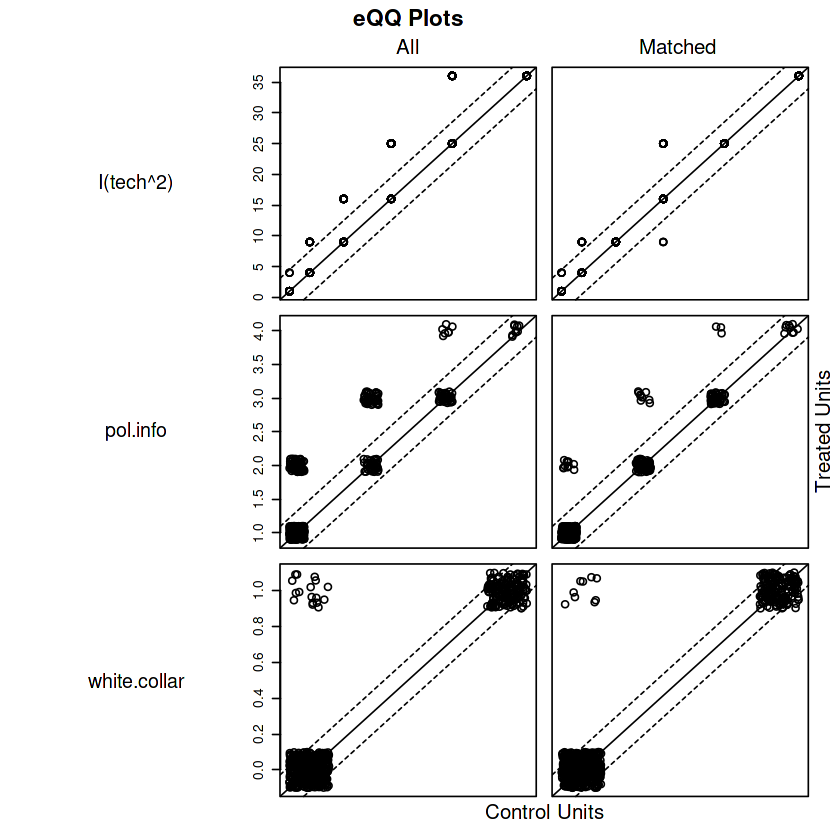

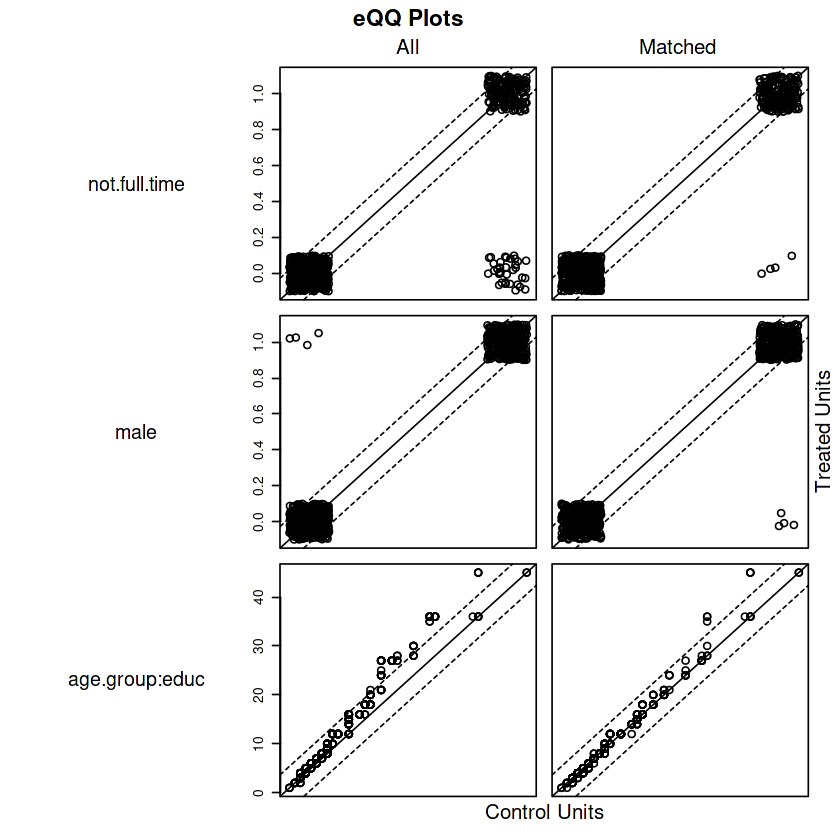

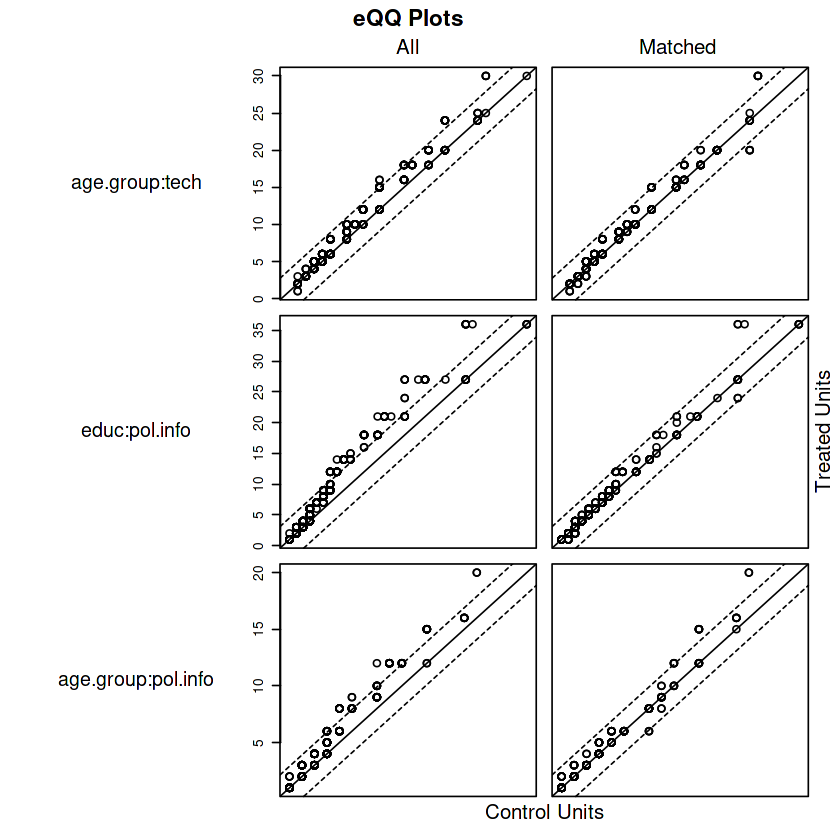

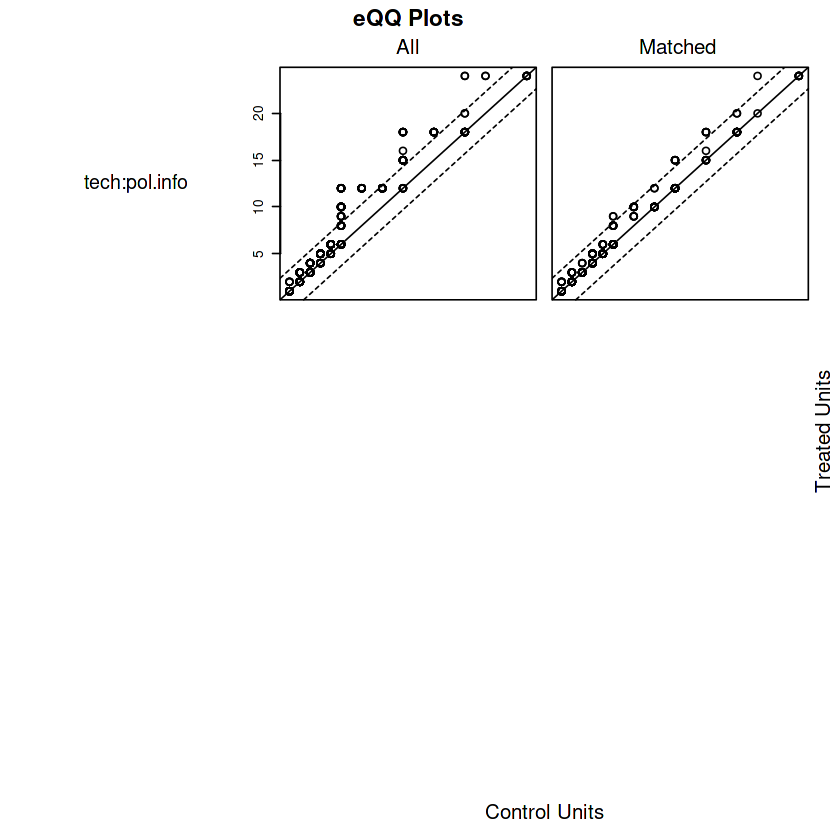

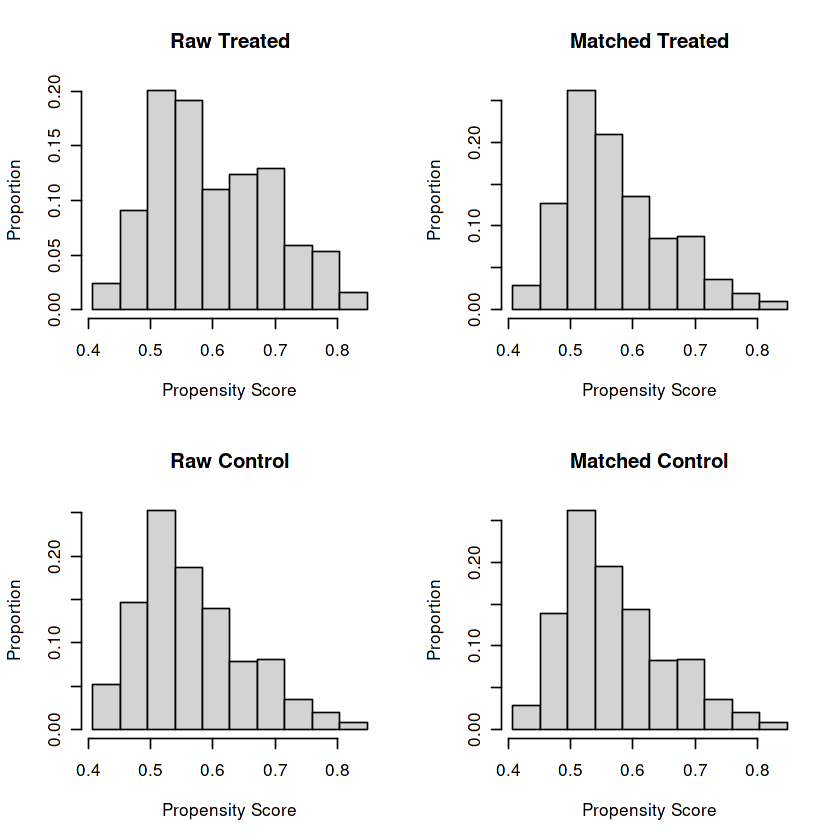

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

null device 
          1

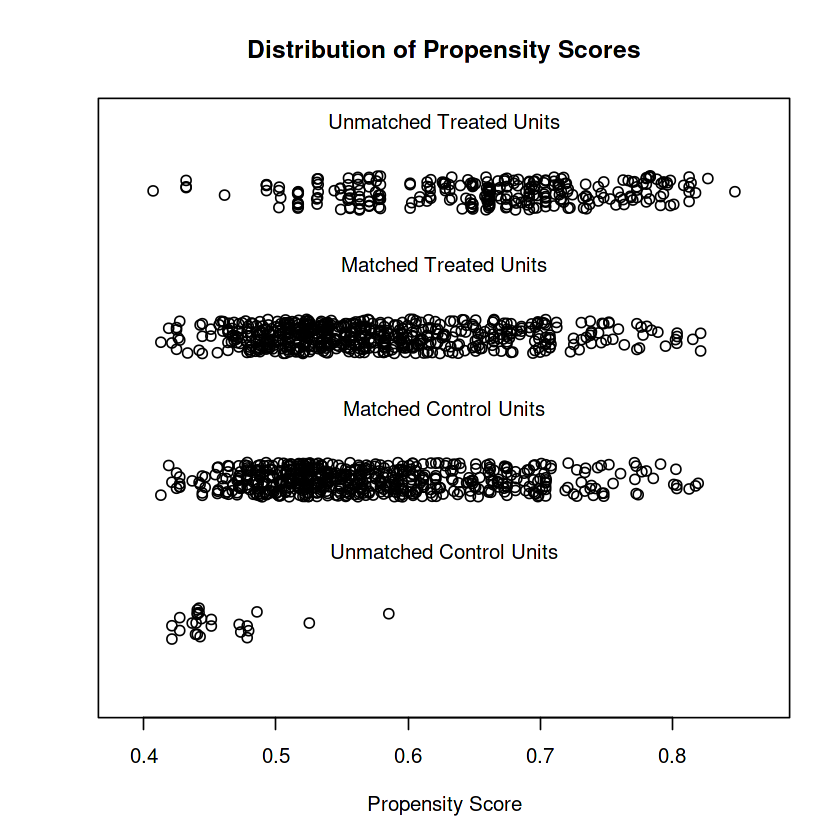

In [17]:
# Original Code with Genetic argument
print("Matching")

set.seed(36466)

m.out.genetic <- matchit(EV ~ age.group + I(age.group^2) + I(age.group^3) + age.group:educ + age.group:tech + educ + I(educ^2) + tech + I(tech^2) + pol.info + educ:pol.info + age.group:pol.info + tech:pol.info + white.collar + not.full.time + male, caliper = 0.05, data = datamatch, method = "genetic", verbose = FALSE, pop.size = 1000, max.generations=300)

#save(m.out, file = "m.out.Rdata")

print("Balance Improvement")
#print(summary(m.out.genetic))

#pdf("balance.pdf")

plot(m.out.genetic)
plot(m.out.genetic, type = "hist")
plot(m.out.genetic, type = "jitter")

dev.off()


#### Table 2 | Balance Statistics: after genetic matching 

In [18]:
#___________________________________________________________________________#

# matched sample

datamatched.genetic <- match.data(m.out.genetic)
datamatched.genetic[datamatched.genetic == 99999] <- NA

#save(datamatched, file = "datamatched.Rdata")

#__________________________ Table 2, post-matching _________________________#

EV.post.genetic <- datamatched.genetic[2]

covariates.post.genetic <- datamatched.genetic[, covariate.lbls]

tab2.post <- matrix(NA, nrow = n.covariates, ncol = 4)
rownames(tab2.post) <- covariate.lbls
colnames(tab2.post) <- c("ev", "tv", "diff", "pvalue")

tab2.post[, 1:2] <- cbind(apply(covariates.post.genetic[EV.post.genetic == 1, ], 2, mean), apply(covariates.post.genetic[EV.post.genetic == 0,], 2, mean))
tab2.post[, 3] <- tab2.post[, 1] - tab2.post[, 2]
for (i in c(1, 2, 6 , 7)){
  tab2.post[i, 4]<-ks.boot(covariates.post.genetic[,i][EV.post.genetic==1],covariates.post.genetic[,i][EV.post.genetic==0], nboots = 500)$ks.boot.pvalue
}
for (i in c(3, 4, 5)){
  tab2.post[i, 4] <- prop.test(table(covariates.post.genetic[, i], EV.post.genetic$EV), n = apply(table(covariates.post.genetic[, i], EV.post.genetic$EV),2 , sum))$p.value
}

tab2 <- cbind(tab2.pre, tab2.post)
tab2[3:5, c(1:3, 5:7)] <- tab2[3:5, c(1:3, 5:7)] * 100

### Table 2 ###

print(tab2, digits = 4)

                  ev     tv    diff  pvalue     ev     tv      diff pvalue
age.group      2.476  2.443  0.0324 0.58600  2.454  2.445  0.008562 1.0000
educ           4.771  4.143  0.6285 0.00000  4.219  4.205  0.013699 0.6120
white.collar  30.254 27.586  2.6678 0.29288 29.281 27.911  1.369863 0.6503
not.full.time 27.714 33.498 -5.7839 0.01998 30.822 31.678 -0.856164 0.8006
male          49.654 49.097  0.5567 0.87472 48.973 49.829 -0.856164 0.8149
tech           4.184  3.910  0.2739 0.00000  4.005  3.943  0.061644 0.4020
pol.info       1.475  1.310  0.1643 0.00000  1.360  1.324  0.035959 0.6600


#### Table 3 | Causal Effect of e-voting: after genetic matching

In [19]:
#__________________________ Table 3, post-matching _________________________#

outcomes.post <- datamatched.genetic[10:18]

tab3.post <- matrix(NA, nrow = n.outcomes, ncol = 5)
rownames(tab3.post) <- outcomes.lbls
colnames(tab3.post) <- c("N", "prop.ev", "prop.tv", "diff", "pvalue")

for (i in 1:n.outcomes) {
  tab3.post[i, 1] <- length(na.omit(outcomes.post[, i]))
  tab3.post[i, 2:3] <- rev(prop.table(table(outcomes.post[, i], datamatched.genetic$EV), 2)[2, ]) * 100
  tab3.post[i, 4] <- tab3.post[i, 2] - tab3.post[i, 3]	
  tab3.post[i, 5] <- prop.test(table(outcomes.post[, i], datamatched.genetic$EV)[2, ], n = apply(table(outcomes.post[, i], datamatched.genetic$EV), 2, sum))$p.value
}

tab3 <- cbind(tab3.pre, tab3.post)

tab3 <- tab3[rev(order(tab3[, 9])), ]

### Table 3 ###

print(tab3, digits = 4)

                 N prop.ev prop.tv   diff    pvalue    N prop.ev prop.tv   diff
eselect.cand  1388   83.84   53.42 30.428 1.237e-34 1106   82.32   54.40 27.926
eval.voting   1460   46.33   21.30 25.035 1.833e-22 1156   44.73   20.97 23.762
agree.evoting 1409   84.14   62.44 21.705 2.864e-20 1120   83.10   62.72 20.372
easy.voting   1469   33.64   11.53 22.111 5.420e-22 1163   31.33   11.17 20.157
how.clean     1284   57.97   40.99 16.980 2.561e-09 1024   58.08   41.11 16.975
sure.counted  1418   86.35   77.02  9.332 7.444e-06 1120   85.92   76.92  8.995
capable.auth  1416   85.14   76.25  8.889 2.954e-05 1126   85.06   76.26  8.807
speed         1443   84.06   80.85  3.209 1.298e-01 1139   83.10   80.71  2.393
conf.secret   1431   77.11   84.53 -7.417 6.506e-04 1136   77.86   84.55 -6.691
                 pvalue
eselect.cand  2.959e-23
eval.voting   1.381e-17
agree.evoting 2.821e-14
easy.voting   7.953e-17
how.clean     7.937e-08
sure.counted  1.485e-04
capable.auth  2.554e-04
speed   

# 📈 DATAVIZ
## Size Setup

In [20]:
options(repr.plot.width=10, repr.plot.height=4)

## Balance of Covariates

Warning message:
“Standardized mean differences and raw mean differences are present in the same plot. 
Use the 'stars' argument to distinguish between them and appropriately label the x-axis.”


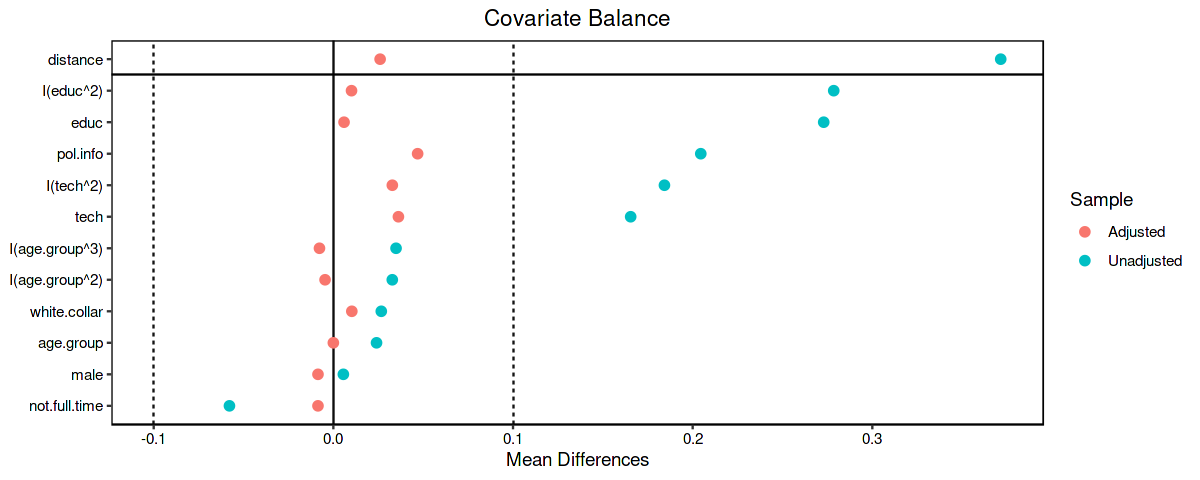

In [21]:
love.plot(bal.tab(m.propensity.out), stat = "mean.diffs", threshold = .1, var.order = "unadjusted")

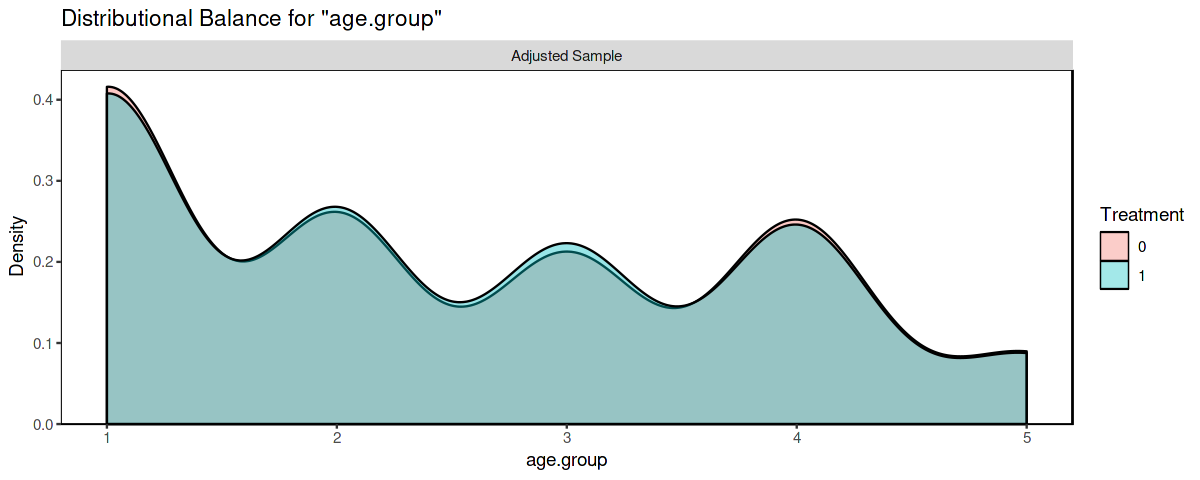

In [22]:
bal.plot(m.propensity.out, var.name = "age.group")

### All in one?

Note: 's.d.denom' not specified; assuming pooled.



Warning message:
“Standardized mean differences and raw mean differences are present in the same plot. 
Use the 'stars' argument to distinguish between them and appropriately label the x-axis.”


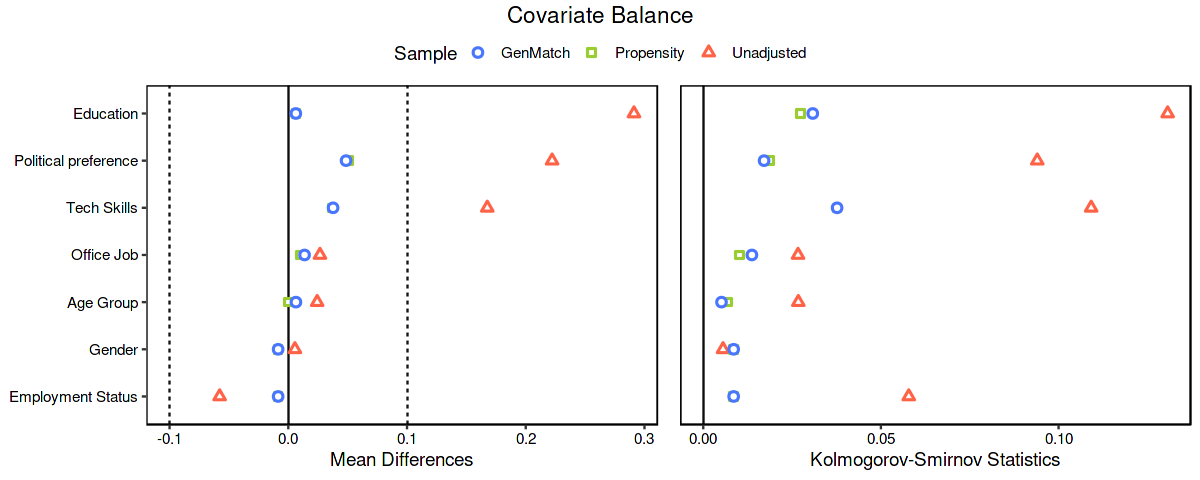

In [23]:
new.names <- c(educ = "Education",
               pol.info = "Political preference",
               tech = "Tech Skills",
               white.collar = "Office Job",
               age.group = "Age Group",
               male = "Gender",
               not.full.time = "Employment Status"
)


love.plot(EV ~ age.group + educ + pol.info + white.collar + not.full.time + male + tech, data=datamatch,
          weights = list(Propensity = get.w(m.propensity.out),
                         GenMatch = get.w(m.out.genetic)),
          stats = c("mean.diffs", "ks.statistics"),
          position = "top",
          #abs = TRUE,
          #line = TRUE,
          var.names = new.names,
          shapes = c("circle filled", "square filled","triangle filled"),
          colors = c("royalblue1", "olivedrab3","tomato"),
          #stat = "mean.diffs", 
          threshold = .1, 
          var.order = "unadjusted")

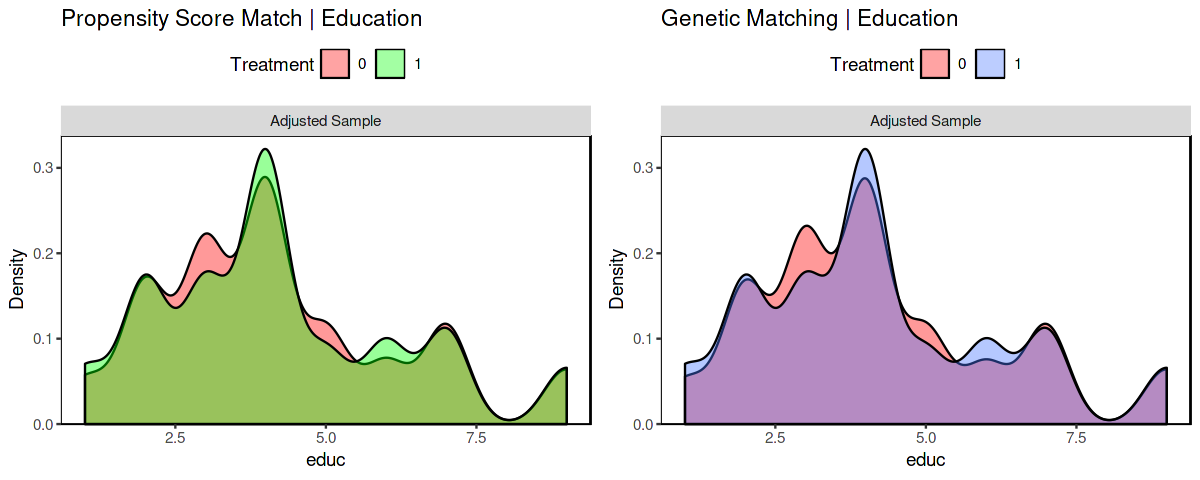

In [24]:
var <- "educ"
var.name <- "Education"
bal.1 <- bal.plot(m.propensity.out, var.name = var, position="top", colors = c("red","green")) + labs(title=paste("Propensity Score Match |", var.name))
bal.2 <- bal.plot(m.out.genetic, var.name = var, position="top", colors = c("red","royalblue1")) + labs(title=paste("Genetic Matching |", var.name))
grid.arrange(bal.1,bal.2,ncol=2,nrow=1)

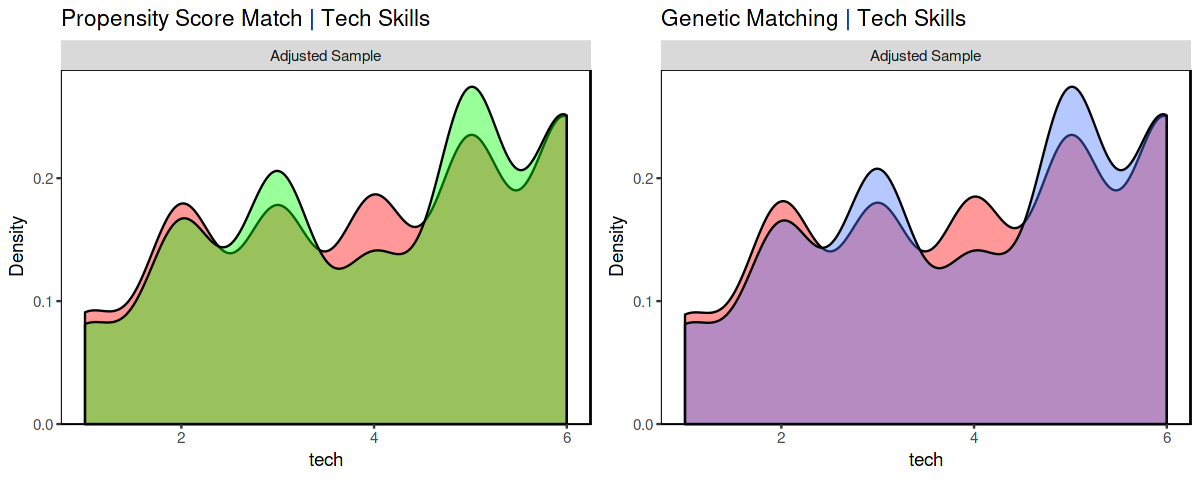

In [25]:
var <- "tech"
var.name <- "Tech Skills"
bal.3 <- bal.plot(m.propensity.out, var.name = var, position="none", colors = c("red","green")) + labs(title=paste("Propensity Score Match |", var.name))
bal.4 <- bal.plot(m.out.genetic, var.name = var, position="none", colors = c("red","royalblue1")) + labs(title=paste("Genetic Matching |", var.name))
grid.arrange(bal.3,bal.4,ncol=2,nrow=1)

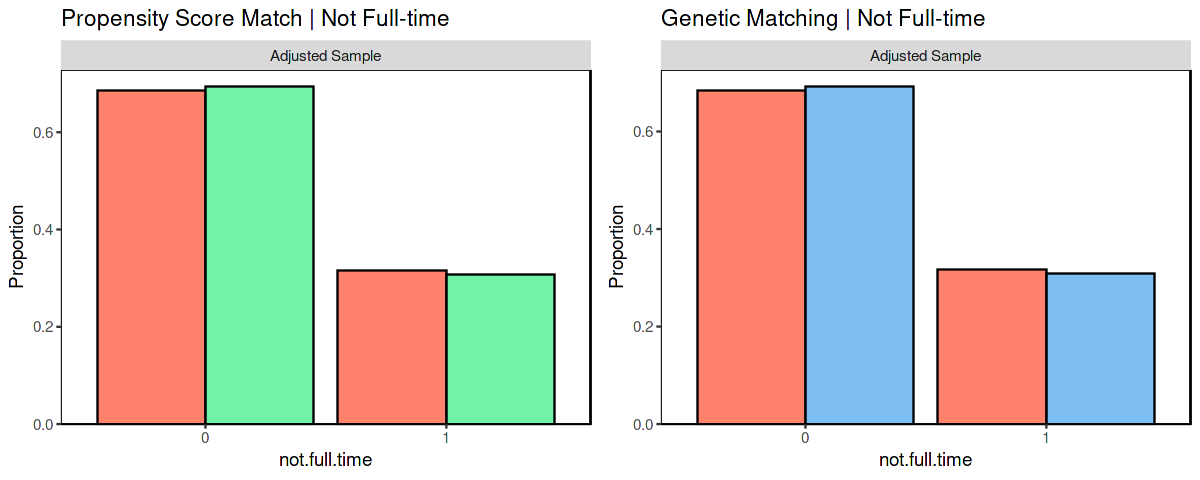

In [26]:
var <- "not.full.time"
var.name <- "Not Full-time"
bal.5 <- bal.plot(m.propensity.out, var.name = var, position="none", colors = c("tomato","seagreen2")) + labs(title=paste("Propensity Score Match |", var.name))
bal.6 <- bal.plot(m.out.genetic, var.name = var, position="none", colors = c("tomato","steelblue2")) + labs(title=paste("Genetic Matching |", var.name))
grid.arrange(bal.5,bal.6,ncol=2,nrow=1)

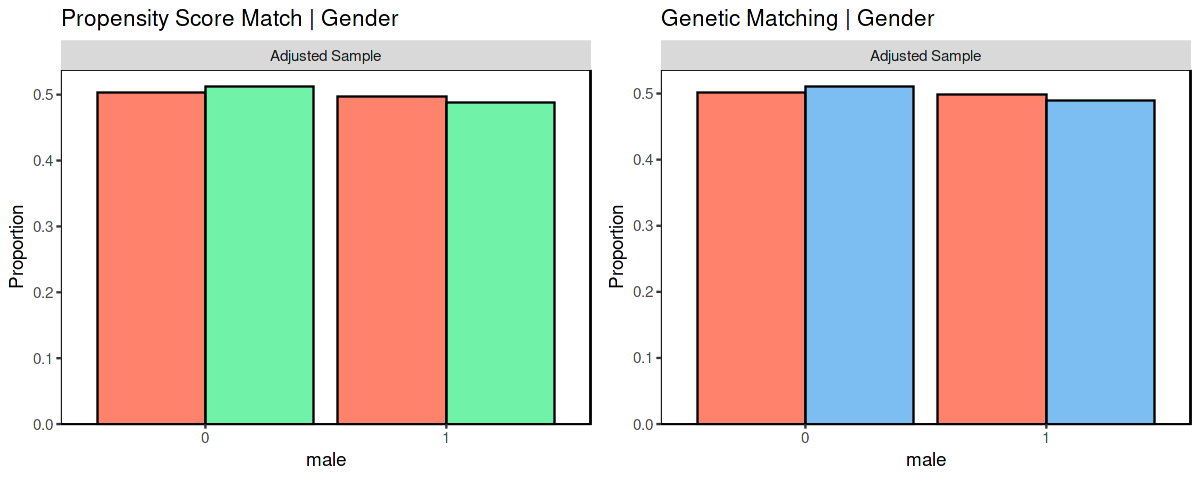

In [27]:
var <- "male"
var.name <- "Gender"
bal.7 <- bal.plot(m.propensity.out, var.name = var, position="none", colors = c("tomato","seagreen2")) + labs(title=paste("Propensity Score Match |", var.name))
bal.8 <- bal.plot(m.out.genetic, var.name = var, position="none", colors = c("tomato","steelblue2")) + labs(title=paste("Genetic Matching |", var.name))
grid.arrange(bal.7,bal.8,ncol=2,nrow=1)

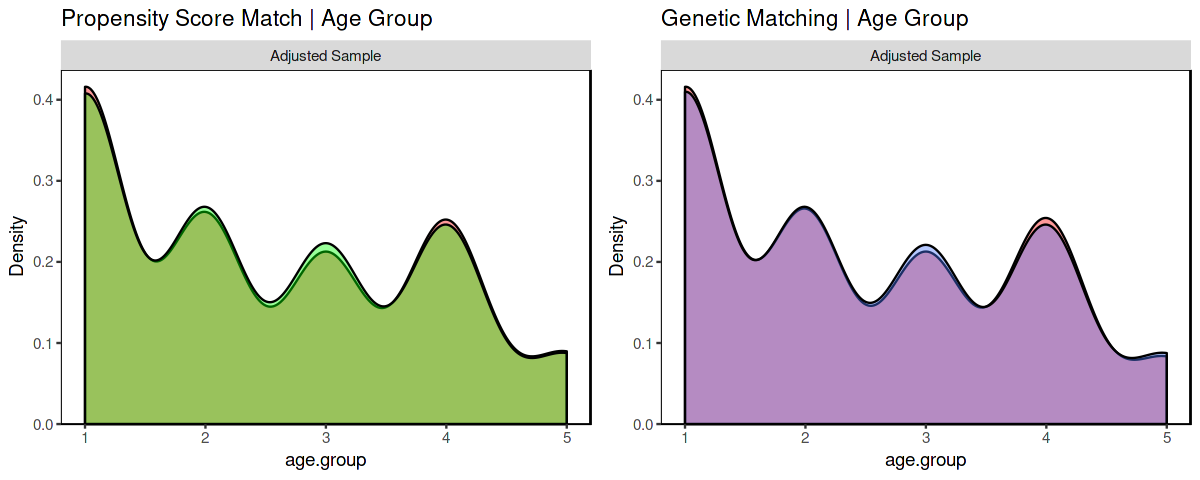

In [28]:
var <- "age.group"
var.name <- "Age Group"
bal.9 <- bal.plot(m.propensity.out, var.name = var, position="none", colors = c("red","green")) + labs(title=paste("Propensity Score Match |", var.name))
bal.10 <- bal.plot(m.out.genetic, var.name = var, position="none", colors = c("red","royalblue1")) + labs(title=paste("Genetic Matching |", var.name))
grid.arrange(bal.9,bal.10,ncol=2,nrow=1)

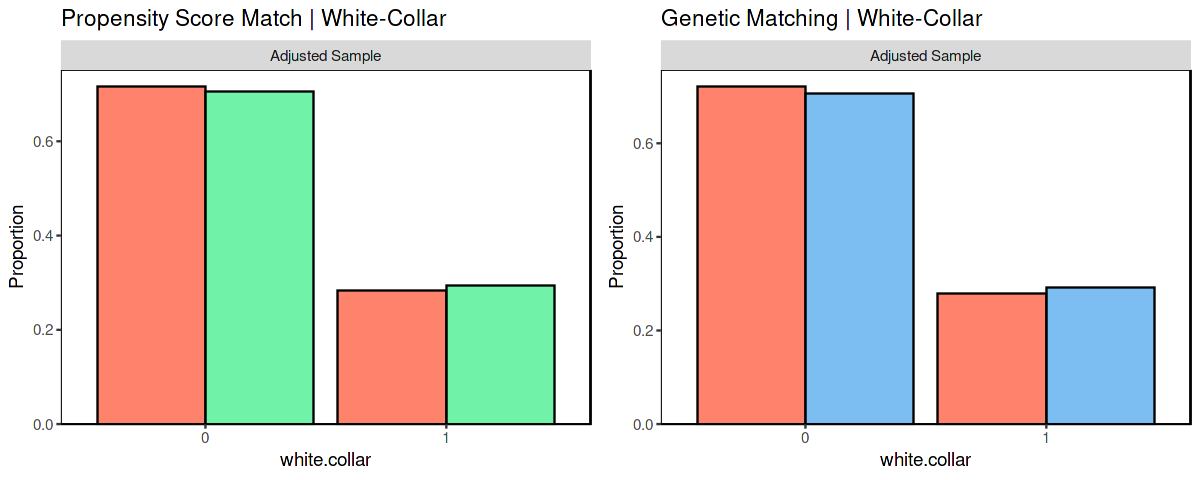

In [29]:
var <- "white.collar"
var.name <- "White-Collar"
bal.11 <- bal.plot(m.propensity.out, var.name = var, position="none", colors = c("tomato","seagreen2")) + labs(title=paste("Propensity Score Match |", var.name))
bal.12 <- bal.plot(m.out.genetic, var.name = var, position="none", colors = c("tomato","steelblue2")) + labs(title=paste("Genetic Matching |", var.name))
grid.arrange(bal.11,bal.12,ncol=2,nrow=1)

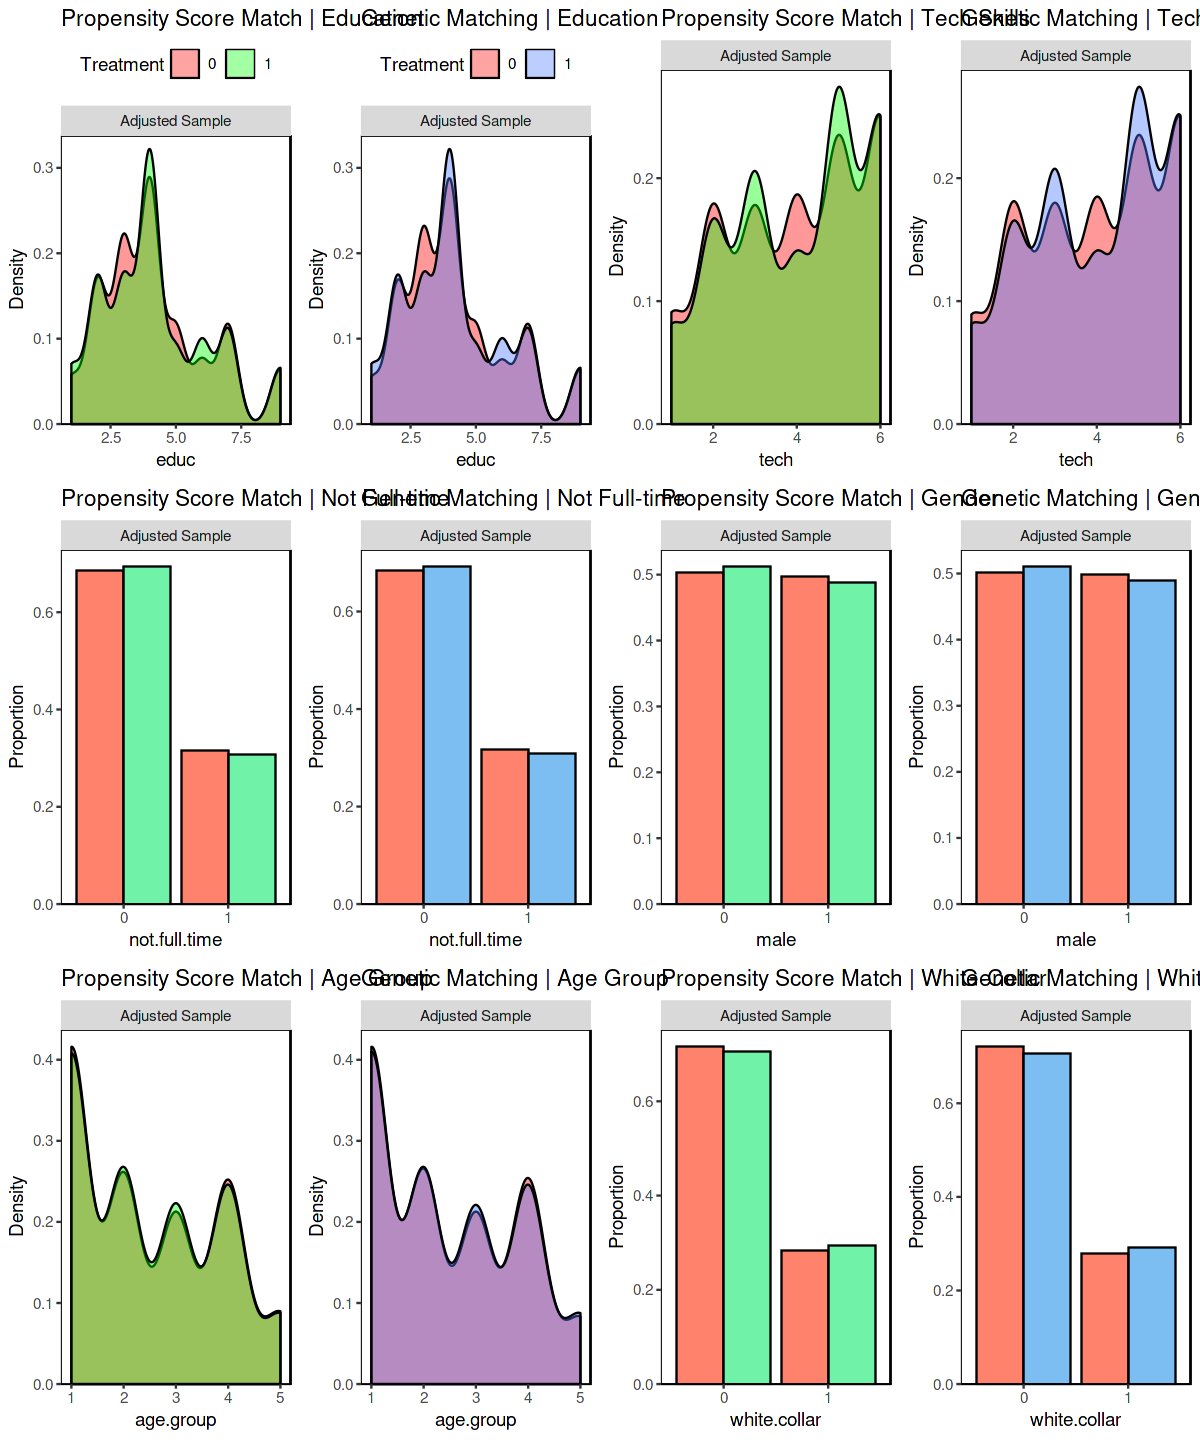

In [30]:
options(repr.plot.width=10, repr.plot.height=12)
grid.arrange(bal.1,bal.2,bal.3,bal.4,bal.5,bal.6,bal.7,bal.8,bal.9,bal.10,bal.11,bal.12,ncol=4,nrow=3)

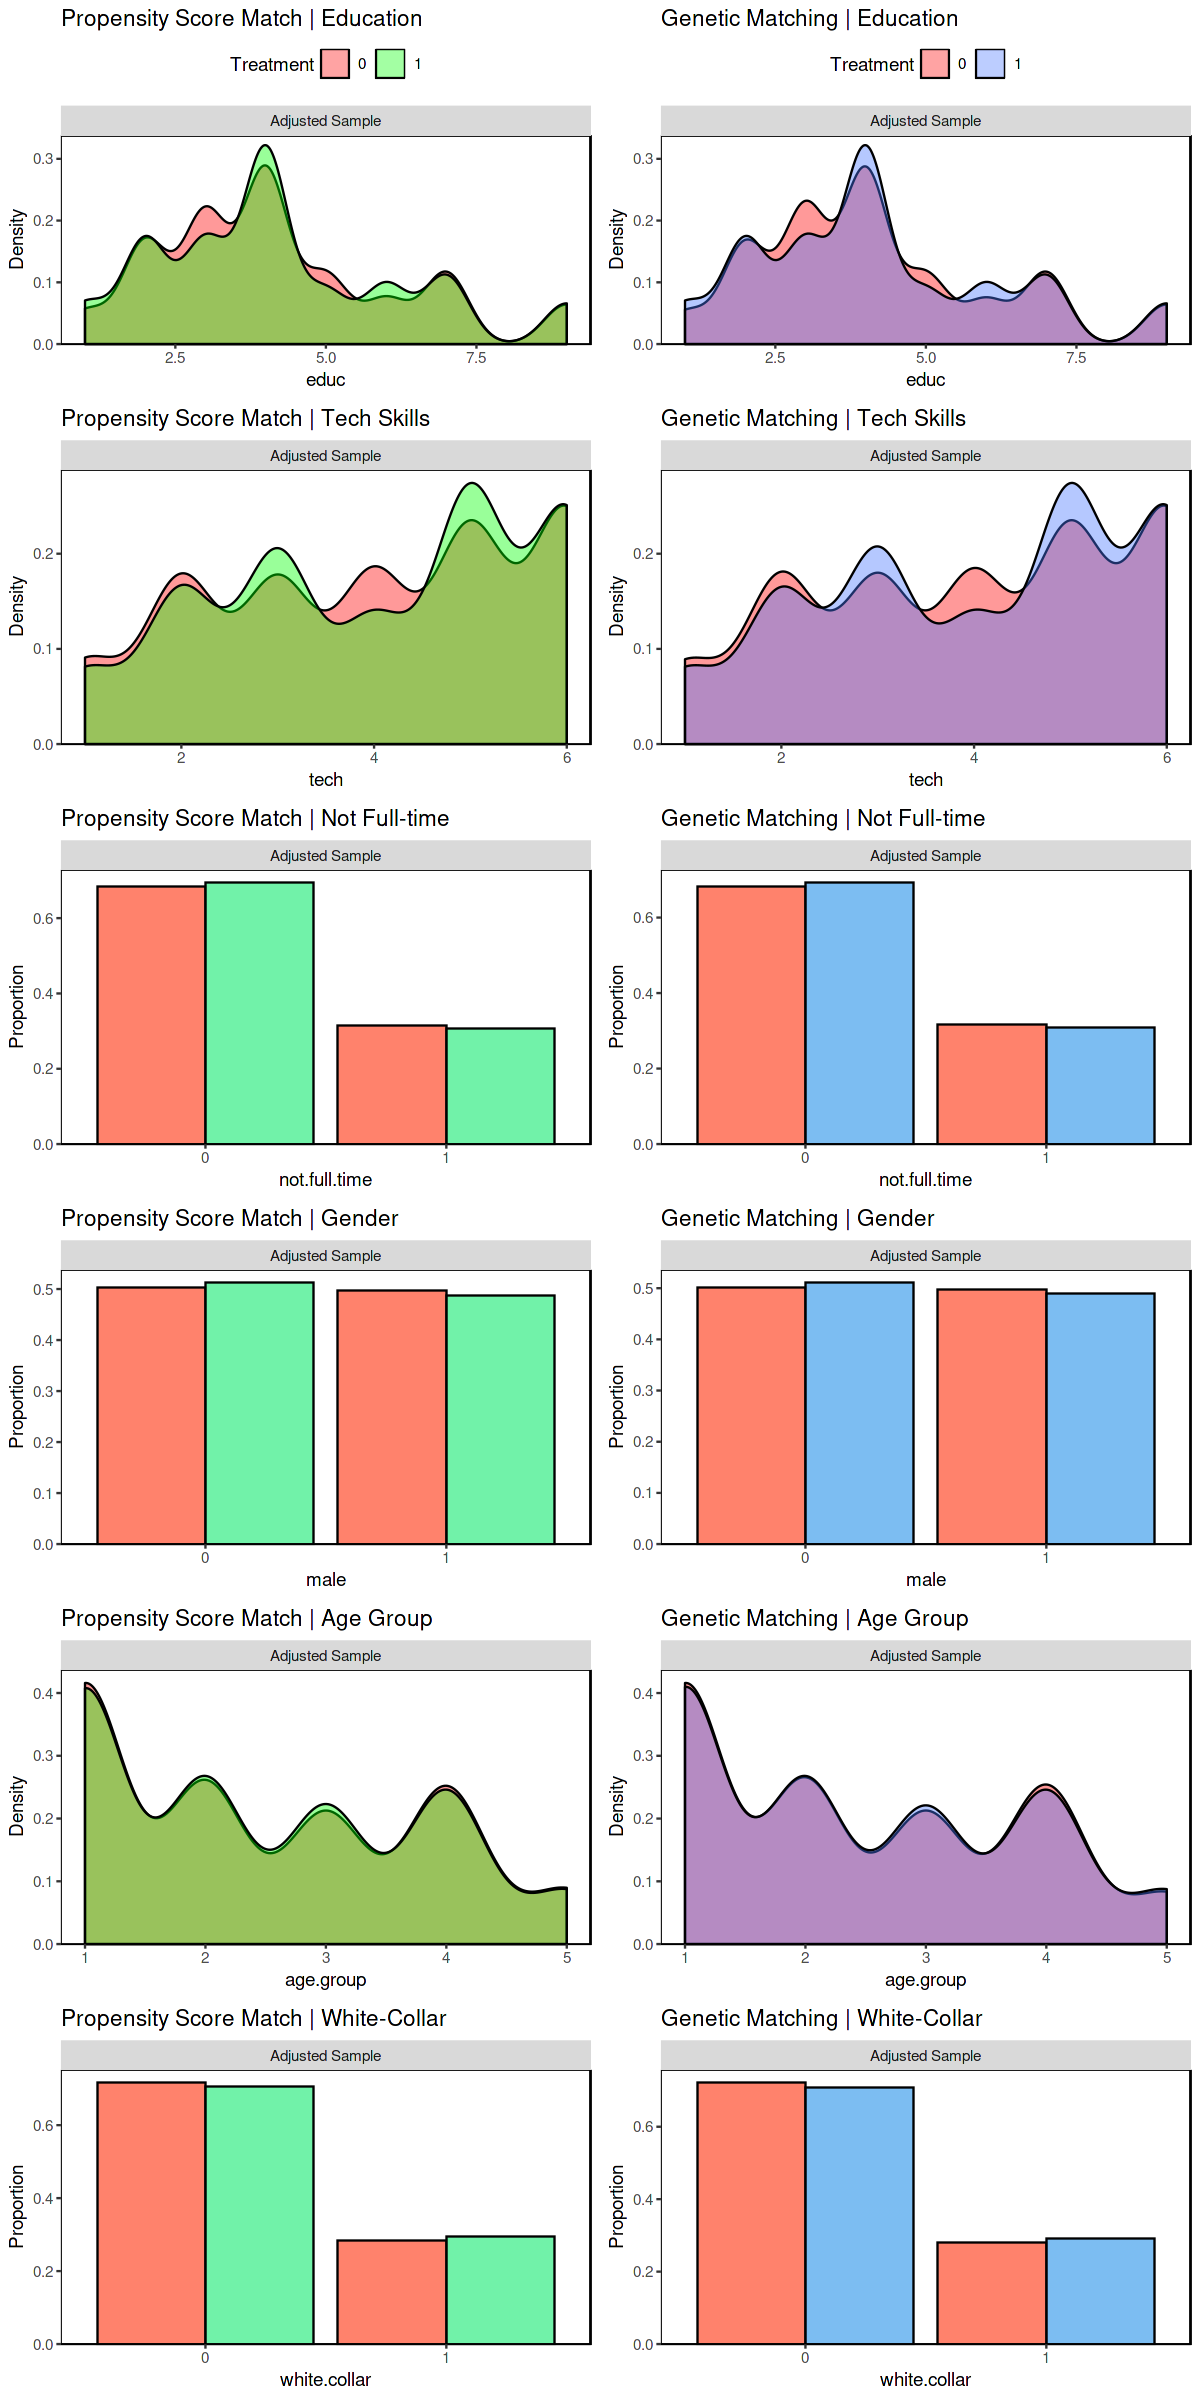

In [31]:
options(repr.plot.width=10, repr.plot.height=20)
grid.arrange(bal.1,bal.2,bal.3,bal.4,bal.5,bal.6,bal.7,bal.8,bal.9,bal.10,bal.11,bal.12,ncol=2,nrow=6)